<a href="https://colab.research.google.com/github/Info-stats-ai/Info-stats-ai/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
# to ftech the mnist dataset
from sklearn.model_selection import train_test_split
# to split the train test data
import numpy as np

In [ ]:
#load MNIST
mnist = fetch_openml("mnist_784",version=1, as_frame=False)

In [ ]:
X, y = mnist["data"], mnist["target"].astype(np.int8)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [ ]:
y.shape

(70000,)

In [ ]:
#digits
digit1, digit2 = 7, 4

In [ ]:
mask = (y == digit1) | (y == digit2)

In [ ]:
mask

array([False, False,  True, ...,  True, False, False])

In [ ]:
# filtering out these numbers

In [ ]:
type(mask)

numpy.ndarray

In [ ]:
mask.shape

(70000,)

In [ ]:
X_filtered = X[mask]
y_filtered = y[mask]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size =0.2, random_state=42, stratify=y_filtered)

In [ ]:
X_train.shape

(11293, 784)

In [ ]:
y_train.shape

(11293,)

### Problem 1 : Train a (soft margin) support vector machine utilizing the Gaussian kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a soft margin SVM with Gaussian (RBF) kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
# C=1.0 for soft margin, gamma='scale' is default


In [ ]:
svm_rbf.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(accuracy_score(y_test, y_pred_rbf))

0.9865439093484419


In [ ]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           4       0.98      1.00      0.99      1365
           7       1.00      0.98      0.99      1459

    accuracy                           0.99      2824
   macro avg       0.99      0.99      0.99      2824
weighted avg       0.99      0.99      0.99      2824



### Use the different error metrics on the test set conclude if the Gaussian kernel have better results than a linear kernel (a linear kernel results in the regular soft margin svm as covered in class)?

In [ ]:
# Train Linear SVM (soft margin)
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [ ]:
# Predict
y_pred_linear = svm_linear.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred_linear))

0.9833569405099151


In [ ]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           4       0.98      0.99      0.98      1365
           7       0.99      0.98      0.98      1459

    accuracy                           0.98      2824
   macro avg       0.98      0.98      0.98      2824
weighted avg       0.98      0.98      0.98      2824



### Insights :

### Problem 2 : One vs One Classifier

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# As here we are considering all the 6 digits I have to generate new train test split
# Use only your 6 assigned digits
assigned_digits = [7, 4, 2, 8, 0, 3]
mask = np.isin(y, assigned_digits)
X_filtered = X[mask]
y_filtered = y[mask]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_filtered
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Base classifier: Linear SVM
base_clf = SVC(kernel='linear', C=1.0)

In [ ]:
# Wrap in One-vs-One strategy
ovo_clf = OneVsOneClassifier(base_clf)

In [ ]:
# Train the OvO model
ovo_clf.fit(X_train_scaled, y_train)

OneVsOneClassifier(estimator=SVC(kernel='linear'))

In [ ]:
# Predict on test data
y_pred_ovo = ovo_clf.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred_ovo))

0.9485469271081467


In [ ]:
print(classification_report(y_test, y_pred_ovo))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           2       0.93      0.92      0.92      1398
           3       0.95      0.93      0.94      1428
           4       0.97      0.96      0.96      1365
           7       0.95      0.96      0.96      1459
           8       0.92      0.94      0.93      1365

    accuracy                           0.95      8396
   macro avg       0.95      0.95      0.95      8396
weighted avg       0.95      0.95      0.95      8396



### One-vs-Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
# Use LinearSVC (same result, way faster)
base_clf_fast = LinearSVC(C=1.0, max_iter=10000, dual=False)

In [ ]:
ova_clf = OneVsRestClassifier(base_clf_fast)

In [ ]:
# Train the classifier
ova_clf.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LinearSVC(dual=False, max_iter=10000))

In [ ]:
# Predict on the test set
y_pred_ova = ova_clf.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred_ova))

0.9468794664125774


In [ ]:
print(classification_report(y_test, y_pred_ova))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           2       0.93      0.92      0.93      1398
           3       0.95      0.93      0.94      1428
           4       0.96      0.96      0.96      1365
           7       0.96      0.96      0.96      1459
           8       0.92      0.93      0.92      1365

    accuracy                           0.95      8396
   macro avg       0.95      0.95      0.95      8396
weighted avg       0.95      0.95      0.95      8396



### Problem 3: K-Means Clustering on 6 Digits
Apply K-Means clustering to your 6-class dataset (digits 7, 4, 2, 8, 0, 3), after removing the labels.
Use values of K = 4, 5, 6, 8.
Use Euclidean distance, and for each K, visualize the cluster centers as images.
Then, summarize your observations.

In [ ]:
X_kmeans = scaler.fit_transform(X_filtered)
# just creating a new variable for this question.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
ks = [4, 5, 6, 8]

In [ ]:
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_kmeans)
    centers = kmeans.cluster_centers_
    # n_init used as to avoid the bad local minima, it  runs the algo 10 times with different initial centers

In [ ]:
#plot each cluster center as an image

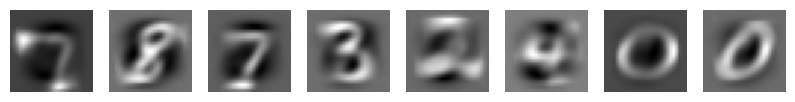

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(k):
      plt.subplot(1, k, i + 1)
      plt.imshow(centers[i].reshape(28, 28), cmap='gray')
      plt.axis('off')
plt.show()

# Insights :
> For this part, I used the K-Means algorithm to cluster digit images from my assigned 6-digit subset (0, 2, 3, 4, 7, 8) without using their labels. I tested the algorithm for **K = 4, 5, 6, and 8**, using **Euclidean distance**, which is the default in `sklearn`. Before clustering, the data was standardized using `StandardScaler`.
>
> For each value of K, I visualized the cluster centers by reshaping them into 28×28 grayscale images. These visualizations helped interpret what each cluster was learning. When **K = 6**, the cluster centers most closely resembled actual digits, indicating a good match with the true number of classes. For **K = 4**, the centers appeared more averaged and less distinct. At **K = 8**, some digits were split into visually similar subgroups, like variants of 3 or 8.
>
> Overall, the results showed that **K = 6 provided the best balance between distinct cluster shapes and interpretability**. This exercise confirmed that K-Means can discover meaningful digit structures even without label supervision, though some digits (like 3 and 8) tend to blur together due to similar curves and loops.




### Problem 4:Apply Hierarchical Clustering to the data corresponding to the six classes assigned
to you (after striping off the lablels). Use two different distances and compare your answers:
Euclidean Distance and the L1 distance, and compare your answers in each case.
Use the dendrograms to identify an appropriate level in the hierarchy that would result in the
’ideal’ clustering. Explain

In [ ]:
# downsample the data as it is computationally expensive
from sklearn.utils import resample

In [ ]:
# Reduce to ~1000 samples to speed up dendrogram creation
X_sample, y_sample = resample(X_filtered, y_filtered, n_samples=1000, random_state=42)


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
# Standardize data
X_sample, y_sample = resample(X_filtered, y_filtered, n_samples=1000, random_state=42)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

In [ ]:
# 1. Euclidean Distance
z_euclidean = linkage(X_scaled, method='ward', metric='euclidean')

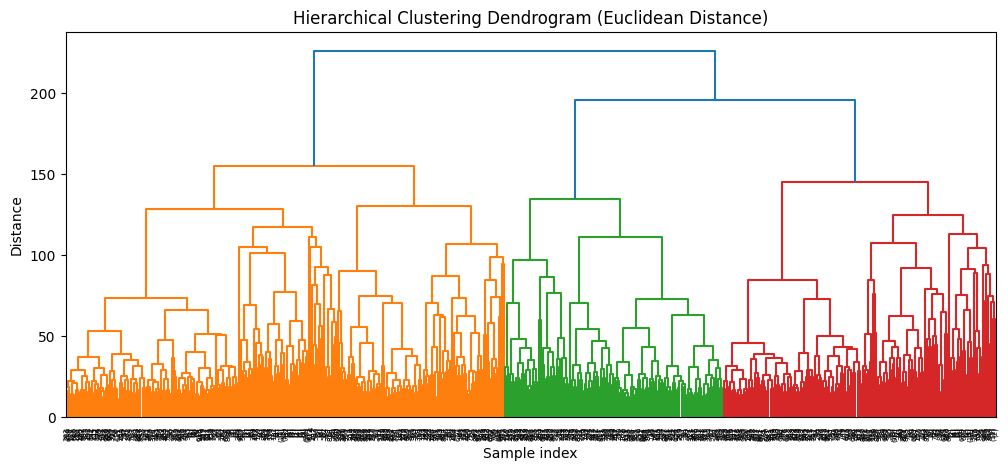

In [ ]:
# Step 2: Plot dendrogram
plt.figure(figsize=(12, 5))
plt.title("Hierarchical Clustering Dendrogram (Euclidean Distance)")
dendrogram(z_euclidean, truncate_mode='level', p=10)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Step 3: Choose number of clusters (e.g., 6 for your 6 digits)
k = 6
y_pred_clusters = fcluster(z_euclidean, k, criterion='maxclust')

In [ ]:
from scipy.stats import mode


In [ ]:
def relabel_clusters(y_true, y_pred):
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):
            # Find the most frequent true label in this cluster
            most_common =mode(y_true[mask], keepdims=False)
            true_label = most_common.mode
            new_labels[mask] = true_label
    return new_labels
#For each cluster (e.g., all samples where y_pred_clusters == 2), it:

#Looks at the true labels of those samples Finds the most common true digit Assigns that digit to the whole cluster

#So the output y_pred_aligned will be a set of predicted digit labels (0, 2, 3, 4, 7, or 8), matched as best as possible.



In [ ]:
print("y_sample shape:", y_sample.shape)
print("y_pred_clusters shape:", y_pred_clusters.shape)


y_sample shape: (1000,)
y_pred_clusters shape: (1000,)


In [ ]:
# Apply the function
y_pred_aligned = relabel_clusters(np.array(y_sample), y_pred_clusters)

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
#classfication report
print(classification_report(y_sample, y_pred_aligned))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       154
           2       0.63      0.87      0.73       150
           3       0.78      0.41      0.54       186
           4       0.42      0.97      0.58       169
           7       0.86      0.76      0.81       170
           8       0.00      0.00      0.00       171

    accuracy                           0.64      1000
   macro avg       0.61      0.66      0.60      1000
weighted avg       0.60      0.64      0.59      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# accuracy
print(accuracy_score(y_sample, y_pred_aligned))

0.644


In [ ]:
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_sample, y_pred_aligned))

Adjusted Rand Index (ARI): 0.4226638273345259


In [ ]:
print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(y_sample, y_pred_clusters))

Adjusted Mutual Information (AMI): 0.5301555629845257


### Perform Hierarchical Clustering with Manhattan Distance

In [ ]:
Z_manhattan = linkage(X_scaled, method='average', metric='cityblock')

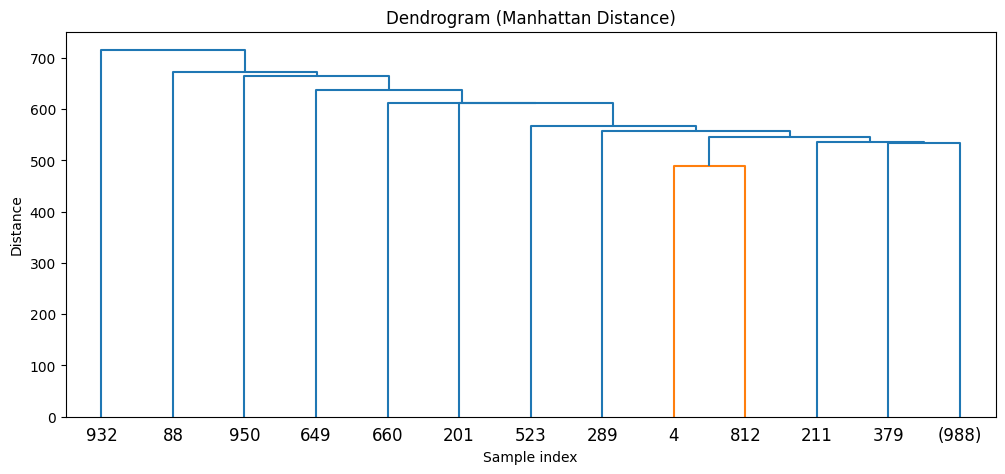

In [ ]:
plt.figure(figsize=(12, 5))
plt.title("Dendrogram (Manhattan Distance)")
dendrogram(Z_manhattan, truncate_mode='level', p=10)  # Top 10 levels
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [ ]:
y_pred_clusters_l1 = fcluster(Z_manhattan, 6, criterion='maxclust')

In [ ]:
def relabel_clusters(y_true, y_pred):
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):
            most_common =mode(y_true[mask], keepdims=False)
            true_label = most_common.mode
            new_labels[mask] = true_label
    return new_labels

# Apply to Manhattan-based clusters
y_pred_aligned_l1 = relabel_clusters(np.array(y_sample), y_pred_clusters_l1)


In [ ]:
print("=== Classification Report (Manhattan Distance) ===")
print(classification_report(y_sample, y_pred_aligned_l1))

print("Accuracy:", accuracy_score(y_sample, y_pred_aligned_l1))
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_sample, y_pred_clusters_l1))
print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(y_sample, y_pred_clusters_l1))


=== Classification Report (Manhattan Distance) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           2       0.00      0.00      0.00       150
           3       0.19      1.00      0.31       186
           4       1.00      0.01      0.02       169
           7       1.00      0.01      0.01       170
           8       1.00      0.01      0.01       171

    accuracy                           0.19      1000
   macro avg       0.53      0.17      0.06      1000
weighted avg       0.54      0.19      0.07      1000

Accuracy: 0.19
Adjusted Rand Index (ARI): -0.00013608844319042157
Adjusted Mutual Information (AMI): -0.00019318882727075644


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 5 (50 points) Treat the Kernel PCA representation using an appropriate kernel and an appro-priate number of components (provide justification).
Use this ”reduced” dataset as your new data. Apply parts 1-4 to this new dataset. Compare
your results, describe the difficulties and improvements in your report.

In [ ]:
X_scaled_kpca = scaler.fit_transform(X_filtered)

### Apply Kernel PCA (with justification)
- I reduce the dataset using Kernel PCA with an RBF kernel.
- start with 50 components — this is common for MNIST because:

- It drastically reduces dimensionality (from 784 to 50)

- Still retains most of the nonlinear structure

- Works well with SVMs and clustering


In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
# Apply Kernel PCA
kpca = KernelPCA(n_components=50, kernel='rbf', gamma=0.04, random_state=42)
X_kpca = kpca.fit_transform(X_scaled_kpca)


#### Re-run Problem 1 — Binary SVM Using Kernel PCA Features

In [ ]:
# Filter Kernel PCA data for digits 4 and 7
mask_47 = (y_filtered == 4) | (y_filtered == 7)
X_kpca_47 = X_kpca[mask_47]
y_47 = y_filtered[mask_47]

# Train-test split
X_train_47, X_test_47, y_train_47, y_test_47 = train_test_split(
    X_kpca_47, y_47, test_size=0.2, random_state=42, stratify=y_47
)


#### Train and Evaluate SVMs (Linear and Gaussian) on Kernel PCA Features

In [ ]:
# 1. Linear SVM
svm_linear_kpca = LinearSVC(C=1.0, max_iter=10000, dual=False)

svm_linear_kpca.fit(X_train_47, y_train_47)
y_pred_linear_kpca = svm_linear_kpca.predict(X_test_47)

print("=== Linear SVM on Kernel PCA Data ===")
print(confusion_matrix(y_test_47, y_pred_linear_kpca))
print(classification_report(y_test_47, y_pred_linear_kpca))
print("Accuracy:", accuracy_score(y_test_47, y_pred_linear_kpca))

# 2. Gaussian (RBF) SVM
svm_rbf_kpca = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_kpca.fit(X_train_47, y_train_47)
y_pred_rbf_kpca = svm_rbf_kpca.predict(X_test_47)

print("=== Gaussian SVM on Kernel PCA Data ===")
print(confusion_matrix(y_test_47, y_pred_rbf_kpca))
print(classification_report(y_test_47, y_pred_rbf_kpca))
print("Accuracy:", accuracy_score(y_test_47, y_pred_rbf_kpca))

=== Linear SVM on Kernel PCA Data ===
[[1363    2]
 [ 829  630]]
              precision    recall  f1-score   support

           4       0.62      1.00      0.77      1365
           7       1.00      0.43      0.60      1459

    accuracy                           0.71      2824
   macro avg       0.81      0.72      0.68      2824
weighted avg       0.82      0.71      0.68      2824

Accuracy: 0.7057365439093485
=== Gaussian SVM on Kernel PCA Data ===
[[1358    7]
 [ 896  563]]
              precision    recall  f1-score   support

           4       0.60      0.99      0.75      1365
           7       0.99      0.39      0.55      1459

    accuracy                           0.68      2824
   macro avg       0.80      0.69      0.65      2824
weighted avg       0.80      0.68      0.65      2824

Accuracy: 0.6802407932011332


#### Re-run Problem 2 — Multiclass SVM (OvO vs OvR) using Kernel PCA Data

In [ ]:
# Train-test split on full 6-digit Kernel PCA data
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X_kpca, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)


### Step 4B: Train OvO and OvR Classifiers on Kernel PCA Features



In [ ]:
# Base classifier: Linear SVM
base_svc = LinearSVC(C=1.0, max_iter=10000, dual=False)

# One-vs-One
ovo_kpca = OneVsOneClassifier(base_svc)
ovo_kpca.fit(X_train_mc, y_train_mc)
y_pred_ovo_kpca = ovo_kpca.predict(X_test_mc)

print("=== One-vs-One (Kernel PCA) ===")
print(confusion_matrix(y_test_mc, y_pred_ovo_kpca))
print(classification_report(y_test_mc, y_pred_ovo_kpca))
print("Accuracy:", accuracy_score(y_test_mc, y_pred_ovo_kpca))

# One-vs-Rest
ovr_kpca = OneVsRestClassifier(base_svc)
ovr_kpca.fit(X_train_mc, y_train_mc)
y_pred_ovr_kpca = ovr_kpca.predict(X_test_mc)

print("\n=== One-vs-Rest (Kernel PCA) ===")
print(confusion_matrix(y_test_mc, y_pred_ovr_kpca))
print(classification_report(y_test_mc, y_pred_ovr_kpca))
print("Accuracy:", accuracy_score(y_test_mc, y_pred_ovr_kpca))

=== One-vs-One (Kernel PCA) ===
[[ 235    0 1146    0    0    0]
 [   0    0 1398    0    0    0]
 [   0    0 1428    0    0    0]
 [   0    0 1073  290    2    0]
 [   0    0  979    2  478    0]
 [   0    0 1365    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      1381
           2       0.00      0.00      0.00      1398
           3       0.19      1.00      0.32      1428
           4       0.99      0.21      0.35      1365
           7       1.00      0.33      0.49      1459
           8       0.00      0.00      0.00      1365

    accuracy                           0.29      8396
   macro avg       0.53      0.29      0.24      8396
weighted avg       0.53      0.29      0.25      8396

Accuracy: 0.2895426393520724


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== One-vs-Rest (Kernel PCA) ===
[[ 314    0 1067    0    0    0]
 [   0    0 1398    0    0    0]
 [   0    0 1427    0    1    0]
 [   0    0  970  392    3    0]
 [   0    0  868    2  589    0]
 [   0    0 1364    1    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      1381
           2       0.00      0.00      0.00      1398
           3       0.20      1.00      0.33      1428
           4       0.99      0.29      0.45      1365
           7       0.99      0.40      0.57      1459
           8       0.00      0.00      0.00      1365

    accuracy                           0.32      8396
   macro avg       0.53      0.32      0.29      8396
weighted avg       0.53      0.32      0.29      8396

Accuracy: 0.3242020009528347


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###  K-Means Clustering on Kernel PCA Data


In [ ]:
# Function to align clusters to true labels
def relabel_clusters(y_true, y_pred):
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):
            most_common = mode(y_true[mask], keepdims=False)
            new_labels[mask] = most_common.mode
    return new_labels

Ks = [4, 5, 6, 8]
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred_clusters = kmeans.fit_predict(X_kpca)

    # Align to true labels
    y_pred_aligned = relabel_clusters(y_filtered, y_pred_clusters)

    print(f"\n=== K-Means Clustering (K={k}) on Kernel PCA Data ===")
    print("Accuracy:", accuracy_score(y_filtered, y_pred_aligned))
    print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_filtered, y_pred_clusters))
    print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(y_filtered, y_pred_clusters))




=== K-Means Clustering (K=4) on Kernel PCA Data ===
Accuracy: 0.17374213836477986
Adjusted Rand Index (ARI): -6.239078738787253e-05
Adjusted Mutual Information (AMI): 0.004360580489958359

=== K-Means Clustering (K=5) on Kernel PCA Data ===
Accuracy: 0.1768391461787688
Adjusted Rand Index (ARI): -0.00010220106130866446
Adjusted Mutual Information (AMI): 0.012635548106673507

=== K-Means Clustering (K=6) on Kernel PCA Data ===
Accuracy: 0.17667238421955403
Adjusted Rand Index (ARI): -0.00011570147716951084
Adjusted Mutual Information (AMI): 0.012239609080694517

=== K-Means Clustering (K=8) on Kernel PCA Data ===
Accuracy: 0.1765770916714313
Adjusted Rand Index (ARI): -0.00011544159791548569
Adjusted Mutual Information (AMI): 0.01190542264031702


#### Re-run Problem 4 — Hierarchical Clustering on Kernel PCA Data

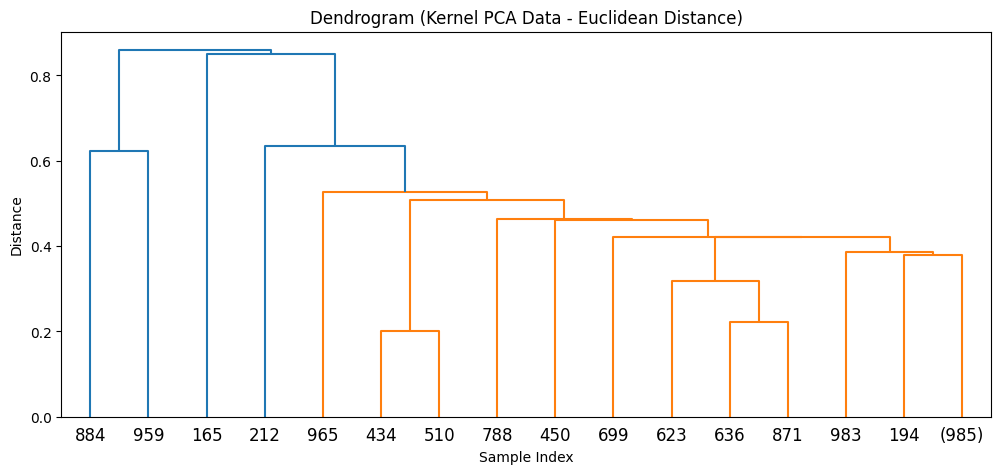

In [ ]:
# Downsample for speed
X_kpca_sample, y_kpca_sample = resample(X_kpca, y_filtered, n_samples=1000, random_state=42)

# Hierarchical clustering with Euclidean distance
Z_kpca = linkage(X_kpca_sample, method='ward', metric='euclidean')

# Plot dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.title("Dendrogram (Kernel PCA Data - Euclidean Distance)")
dendrogram(Z_kpca, truncate_mode='level', p=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut to get 6 clusters
y_pred_kpca_clusters = fcluster(Z_kpca, 6, criterion='maxclust')


#### Evaluate Clustering (Kernel PCA + Euclidean)

In [ ]:
#  predicted clusters with true labels
def relabel_clusters(y_true, y_pred):
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):
            most_common = mode(y_true[mask], keepdims=False)
            new_labels[mask] = most_common.mode
    return new_labels

y_pred_kpca_aligned = relabel_clusters(np.array(y_kpca_sample), y_pred_kpca_clusters)

# Print evaluation results
print("=== Hierarchical Clustering on Kernel PCA Data ===")
print(classification_report(y_kpca_sample, y_pred_kpca_aligned))
print("Accuracy:", accuracy_score(y_kpca_sample, y_pred_kpca_aligned))
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_kpca_sample, y_pred_kpca_clusters))
print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(y_kpca_sample, y_pred_kpca_clusters))

=== Hierarchical Clustering on Kernel PCA Data ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           2       0.00      0.00      0.00       150
           3       0.19      1.00      0.31       186
           4       0.00      0.00      0.00       169
           7       1.00      0.03      0.06       170
           8       0.00      0.00      0.00       171

    accuracy                           0.19      1000
   macro avg       0.20      0.17      0.06      1000
weighted avg       0.20      0.19      0.07      1000

Accuracy: 0.191
Adjusted Rand Index (ARI): -1.9843111148673032e-05
Adjusted Mutual Information (AMI): -4.096655011378384e-05


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 6:(50 points) Treat the Laplacian Eigen Map representation using an appropriate number of
components (provide justification).
Use this ”reduced” dataset as your new data. Apply parts 1-4 to this new dataset. Provide
an analysis of your results, describe the difficulties and improvements in your report.

In [ ]:
X_scaled_lap = scaler.fit_transform(X_filtered)

In [ ]:
from sklearn.manifold import SpectralEmbedding


In [ ]:
# Apply Laplacian Eigenmaps
embedding = SpectralEmbedding(
    n_components=50,
    n_neighbors=10,
    affinity='nearest_neighbors',
    random_state=42
)

In [ ]:
X_lap = embedding.fit_transform(X_scaled_lap)

- I use SpectralEmbedding from sklearn.manifold — this performs Laplacian Eigenmaps internally.

### Parameters:
- n_components=50: reduces data from 784 to 50 dimensions

- n_neighbors=10: balances local graph structure

- affinity='nearest_neighbors': builds the graph using k-nearest neighbors

- random_state=42: ensures reproducibility

##Constructs a nearest-neighbors graph of the input data

- Builds a Laplacian matrix

- Extracts eigenvectors representing local manifold structure

- Returns a new feature space where similar images are closer

### Re-run Problem 1 — Binary SVM Using Laplacian Eigenmaps Data (Digits 4 vs 7)

In [ ]:
# Select only digits 4 and 7
mask_47 = (y_filtered == 4) | (y_filtered == 7)
X_lap_47 = X_lap[mask_47]
y_47 = y_filtered[mask_47]

# Train-test split
X_train_47_lap, X_test_47_lap, y_train_47_lap, y_test_47_lap = train_test_split(
    X_lap_47, y_47, test_size=0.2, random_state=42, stratify=y_47
)

### Train and Evaluate SVMs on Laplacian Eigenmaps Data (4 vs 7)


In [ ]:
# Linear SVM — faster and more stable than SVC(kernel='linear')
svm_linear_lap = LinearSVC(C=1.0, max_iter=10000, dual=False)
svm_linear_lap.fit(X_train_47_lap, y_train_47_lap)
y_pred_linear_lap = svm_linear_lap.predict(X_test_47_lap)

print("=== Linear SVM (Laplacian Eigenmaps) ===")
print(confusion_matrix(y_test_47_lap, y_pred_linear_lap))
print(classification_report(y_test_47_lap, y_pred_linear_lap))
print("Accuracy:", accuracy_score(y_test_47_lap, y_pred_linear_lap))


# RBF SVM — may take longer, but handles non-linear decision boundaries
svm_rbf_lap = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_lap.fit(X_train_47_lap, y_train_47_lap)
y_pred_rbf_lap = svm_rbf_lap.predict(X_test_47_lap)

print("\n=== RBF SVM (Laplacian Eigenmaps) ===")
print(confusion_matrix(y_test_47_lap, y_pred_rbf_lap))
print(classification_report(y_test_47_lap, y_pred_rbf_lap))
print("Accuracy:", accuracy_score(y_test_47_lap, y_pred_rbf_lap))

=== Linear SVM (Laplacian Eigenmaps) ===
[[1331   34]
 [  24 1435]]
              precision    recall  f1-score   support

           4       0.98      0.98      0.98      1365
           7       0.98      0.98      0.98      1459

    accuracy                           0.98      2824
   macro avg       0.98      0.98      0.98      2824
weighted avg       0.98      0.98      0.98      2824

Accuracy: 0.9794617563739377

=== RBF SVM (Laplacian Eigenmaps) ===
[[1354   11]
 [  33 1426]]
              precision    recall  f1-score   support

           4       0.98      0.99      0.98      1365
           7       0.99      0.98      0.98      1459

    accuracy                           0.98      2824
   macro avg       0.98      0.98      0.98      2824
weighted avg       0.98      0.98      0.98      2824

Accuracy: 0.9844192634560907


### Re-run Problem 2 — Multiclass SVM on Laplacian Eigenmaps Data
We’ll use the full Laplacian-reduced dataset X_lap and y_filtered (digits 0, 2, 3, 4, 7, 8).

In [ ]:
# Use full Laplacian data for 6-class classification
X_train_mc_lap, X_test_mc_lap, y_train_mc_lap, y_test_mc_lap = train_test_split(
    X_lap, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

### Train OvO and OvR SVMs on Laplacian Data

In [ ]:
# One-vs-One using SVC
ovo_lap = OneVsOneClassifier(SVC(kernel='linear', C=1.0))
ovo_lap.fit(X_train_mc_lap, y_train_mc_lap)
y_pred_ovo_lap = ovo_lap.predict(X_test_mc_lap)

print("=== One-vs-One (Laplacian Eigenmaps) ===")
print(confusion_matrix(y_test_mc_lap, y_pred_ovo_lap))
print(classification_report(y_test_mc_lap, y_pred_ovo_lap))
print("Accuracy:", accuracy_score(y_test_mc_lap, y_pred_ovo_lap))

# One-vs-Rest using LinearSVC for better performance
ovr_lap = OneVsRestClassifier(LinearSVC(C=1.0, max_iter=10000, dual=False))
ovr_lap.fit(X_train_mc_lap, y_train_mc_lap)
y_pred_ovr_lap = ovr_lap.predict(X_test_mc_lap)

print("\n=== One-vs-Rest (Laplacian Eigenmaps) ===")
print(confusion_matrix(y_test_mc_lap, y_pred_ovr_lap))
print(classification_report(y_test_mc_lap, y_pred_ovr_lap))
print("Accuracy:", accuracy_score(y_test_mc_lap, y_pred_ovr_lap))

=== One-vs-One (Laplacian Eigenmaps) ===
[[   0    0    0    0 1381    0]
 [   0    0    0    0 1398    0]
 [   0    0    0    0 1428    0]
 [   0    0    0    0 1365    0]
 [   0    0    0    0 1459    0]
 [   0    0    0    0 1365    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1381
           2       0.00      0.00      0.00      1398
           3       0.00      0.00      0.00      1428
           4       0.00      0.00      0.00      1365
           7       0.17      1.00      0.30      1459
           8       0.00      0.00      0.00      1365

    accuracy                           0.17      8396
   macro avg       0.03      0.17      0.05      8396
weighted avg       0.03      0.17      0.05      8396

Accuracy: 0.17377322534540257


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== One-vs-Rest (Laplacian Eigenmaps) ===
[[1367    3    2    7    1    1]
 [  20 1304   18   15   25   16]
 [   1   26 1354    2   28   17]
 [   3   18    1 1310   18   15]
 [   1   11    6   22 1418    1]
 [  10   12   71   17   10 1245]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1381
           2       0.95      0.93      0.94      1398
           3       0.93      0.95      0.94      1428
           4       0.95      0.96      0.96      1365
           7       0.95      0.97      0.96      1459
           8       0.96      0.91      0.94      1365

    accuracy                           0.95      8396
   macro avg       0.95      0.95      0.95      8396
weighted avg       0.95      0.95      0.95      8396

Accuracy: 0.9525964745116722


### Re-run Problem 3 — K-Means Clustering on Laplacian Eigenmaps Data
 X_lap dataset (Laplacian-reduced features for digits 0, 2, 3, 4, 7, 8) using:

K = 4, 5, 6, 8


In [ ]:
def relabel_clusters(y_true, y_pred):
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):
            most_common = mode(y_true[mask], keepdims=False)
            new_labels[mask] = most_common.mode
    return new_labels


In [ ]:
Ks = [4, 5, 6, 8]

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred_clusters = kmeans.fit_predict(X_lap)


In [ ]:
# Align clusters to actual digit labels
y_pred_aligned = relabel_clusters(y_filtered, y_pred_clusters)

In [ ]:
print(f"\n=== K-Means (K={k}) on Laplacian Eigenmaps Data ===")
print("Accuracy:", accuracy_score(y_filtered, y_pred_aligned))
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_filtered, y_pred_clusters))
print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(y_filtered, y_pred_clusters))


=== K-Means (K=8) on Laplacian Eigenmaps Data ===
Accuracy: 0.692967409948542
Adjusted Rand Index (ARI): 0.43310213037270934
Adjusted Mutual Information (AMI): 0.6111271280058783


### Re-run Problem 4 — Hierarchical Clustering on Laplacian Eigenmaps Data:

In [ ]:
# Downsample for speed
X_lap_sample, y_lap_sample = resample(X_lap, y_filtered, n_samples=1000, random_state=42)

In [ ]:
# Perform linkage (Euclidean)
Z_lap = linkage(X_lap_sample, method='ward', metric='euclidean')

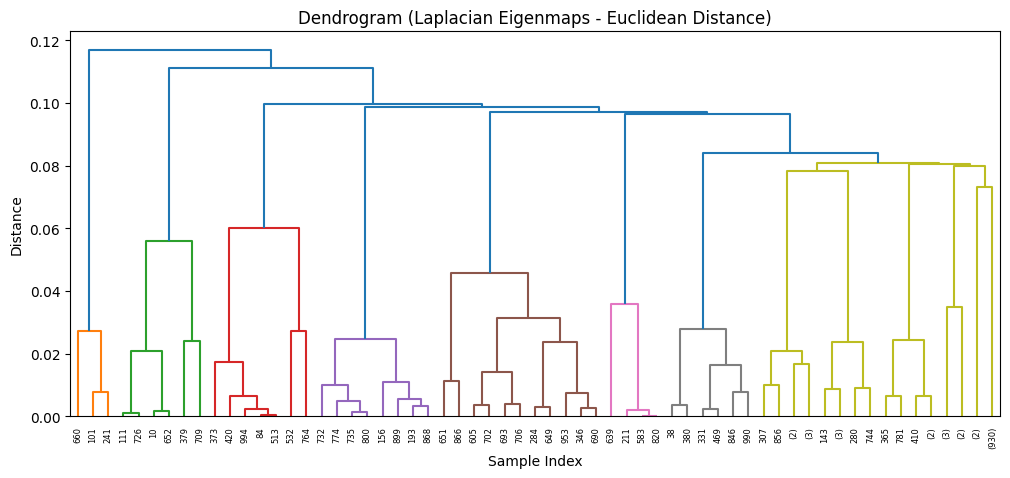

In [ ]:
# Plot dendrogram
plt.figure(figsize=(12, 5))
plt.title("Dendrogram (Laplacian Eigenmaps - Euclidean Distance)")
dendrogram(Z_lap, truncate_mode='level', p=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Cut tree to get 6 clusters
y_pred_clusters_lap = fcluster(Z_lap, 6, criterion='maxclust')


In [ ]:
# predicted cluster labels with actual labels
def relabel_clusters(y_true, y_pred):
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):
            most_common = mode(y_true[mask], keepdims=False)
            new_labels[mask] = most_common.mode
    return new_labels

In [ ]:
y_pred_aligned_lap = relabel_clusters(np.array(y_lap_sample), y_pred_clusters_lap)

In [ ]:
# Evaluation
print("=== Hierarchical Clustering (Laplacian Eigenmaps) ===")
print(classification_report(y_lap_sample, y_pred_aligned_lap))
print("Accuracy:", accuracy_score(y_lap_sample, y_pred_aligned_lap))
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_lap_sample, y_pred_clusters_lap))
print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(y_lap_sample, y_pred_clusters_lap))

=== Hierarchical Clustering (Laplacian Eigenmaps) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           2       0.88      0.05      0.09       150
           3       0.19      0.99      0.32       186
           4       1.00      0.04      0.08       169
           7       0.91      0.06      0.11       170
           8       0.00      0.00      0.00       171

    accuracy                           0.21      1000
   macro avg       0.50      0.19      0.10      1000
weighted avg       0.49      0.21      0.10      1000

Accuracy: 0.209
Adjusted Rand Index (ARI): 0.00017020302056973497
Adjusted Mutual Information (AMI): 0.04199305303008961


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
